In [1]:
import os

In [2]:
%pwd

'D:\\Desktop\\Deep Learning\\Lab 4\\Main MNSIT-MLPClassifer\\Research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'D:\\Desktop\\Deep Learning\\Lab 4\\Main MNSIT-MLPClassifer'


11490434/11490434 [==============================] - 3s 0us/step


2024-02-19 14:35:12,239 - INFO - Data loaded and preprocessed successfully.


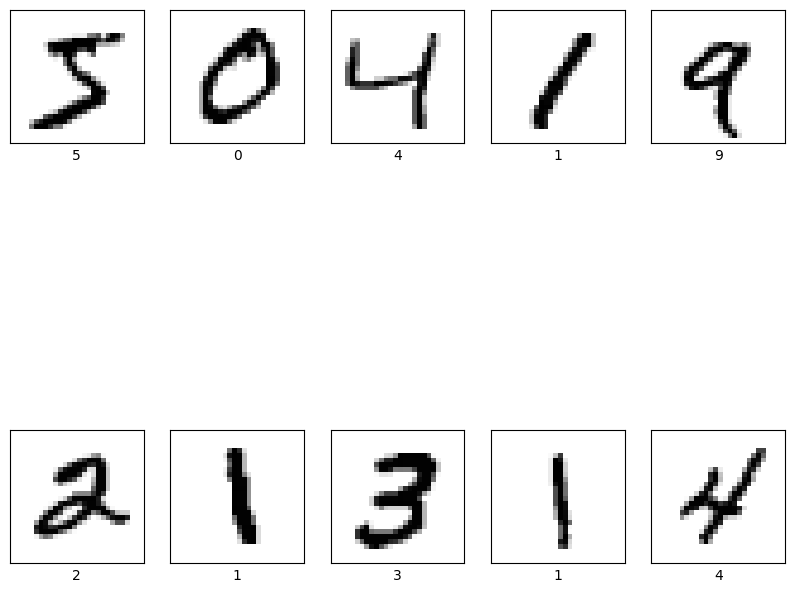

2024-02-19 14:35:12,531 - INFO - Validation status written to: D:\Desktop\Deep Learning\Lab 4\Main MNSIT-MLPClassifer\data_validation\validation_status.txt


In [5]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import logging
from dataclasses import dataclass
from pathlib import Path
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

@dataclass
class DataValidationConfig:
    root_dir: Path
    status_file: Path

class ConfigurationManager:
    def __init__(self, config_dir):
        self.config_dir = Path(config_dir)

    def get_data_validation_config(self) -> DataValidationConfig:
        root_dir = self.config_dir / 'data_validation'
        status_file = root_dir / "validation_status.txt"

        # Ensure the directory for the status file exists
        root_dir.mkdir(parents=True, exist_ok=True)

        return DataValidationConfig(root_dir=root_dir, status_file=status_file)

class DataProcessor:
    def __init__(self, config: DataValidationConfig):
        self.config = config
        self.train_images = None
        self.train_labels = None
        self.test_images = None
        self.test_labels = None

    def load_and_preprocess_data(self):
        # Load MNIST data
        (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

        # Preprocess the data
        self.train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
        self.test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
        self.train_labels = to_categorical(train_labels)
        self.test_labels = to_categorical(test_labels)

        logging.info(f"Data loaded and preprocessed successfully.")

    def display_sample_images(self):
        # Display the first 10 images from the dataset
        plt.figure(figsize=(10, 10))
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_images[i].reshape(28, 28), cmap=plt.cm.binary)
            plt.xlabel(self.train_labels[i].argmax())
        plt.show()

    def write_validation_status(self):
        with open(self.config.status_file, 'w', encoding='utf-8') as f:
            f.write(f"Training data shape: {self.train_images.shape}\n")
            f.write(f"Training labels shape: {self.train_labels.shape}\n")
            f.write(f"Testing data shape: {self.test_images.shape}\n")
            f.write(f"Testing labels shape: {self.test_labels.shape}\n")
            logging.info(f"Validation status written to: {self.config.status_file}")

def main():
    config_dir = Path(os.getcwd())  # Update with your root directory path
    config_manager = ConfigurationManager(config_dir)
    data_validation_config = config_manager.get_data_validation_config()
    
    data_processor = DataProcessor(data_validation_config)
    data_processor.load_and_preprocess_data()
    data_processor.display_sample_images()
    data_processor.write_validation_status()

if __name__ == "__main__":
    main()


In [6]:
# Read the dataset from a text file
file_path = r"data_validation\validation_status.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    dataset_text = file.read()

print(dataset_text)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing data shape: (10000, 28, 28, 1)
Testing labels shape: (10000, 10)

